In [150]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [151]:
# Load data
df = pd.read_csv('merged-data.csv')
df = df.dropna()
df.head()

,id,radar,time,average,max,install,site
0,0,1,09-11-2021 0:00,45.541888,65.26,0,50
1,1,1,09-11-2021 1:00,44.298992,62.87,0,50
2,2,1,09-11-2021 2:00,44.423393,74.57,0,50
3,3,1,09-11-2021 3:00,45.502300,66.85,0,50
4,4,1,09-11-2021 4:00,46.588100,64.86,0,50


In [152]:
# Convert "time" header from string to datetime object
df['time'] = pd.to_datetime(df['time'])
df.dtypes

id                  int64
radar               int64
time       datetime64[ns]
average           float64
max               float64
install             int64
site                int64
dtype: object

In [153]:
# Add hour column as numeric in 24h clock.
df['hour'] = df['time'].dt.hour
df.head()

,id,radar,time,average,max,install,site,hour
0,0,1,2021-09-11 00:00:00,45.541888,65.26,0,50,0
1,1,1,2021-09-11 01:00:00,44.298992,62.87,0,50,1
2,2,1,2021-09-11 02:00:00,44.423393,74.57,0,50,2
3,3,1,2021-09-11 03:00:00,45.502300,66.85,0,50,3
4,4,1,2021-09-11 04:00:00,46.588100,64.86,0,50,4


In [154]:
# Add 'limit' column as numeric, km/h speed limit
df['limit'] = df['site'].apply(lambda a : 100 - a)
df.head()

,id,radar,time,average,max,install,site,hour,limit
0,0,1,2021-09-11 00:00:00,45.541888,65.26,0,50,0,50
1,1,1,2021-09-11 01:00:00,44.298992,62.87,0,50,1,50
2,2,1,2021-09-11 02:00:00,44.423393,74.57,0,50,2,50
3,3,1,2021-09-11 03:00:00,45.502300,66.85,0,50,3,50
4,4,1,2021-09-11 04:00:00,46.588100,64.86,0,50,4,50


In [155]:
# Average speeds by each radar
df.groupby('radar').mean()['average']

radar
1    42.402413
2    45.011580
3    35.406835
Name: average, dtype: float64

In [156]:
# Average speeds by each site
df.groupby('site').mean()['average']

site
50    43.701983
60    35.406835
Name: average, dtype: float64

In [157]:
# Max speeds by each radar
df.groupby('radar').max()['max']

radar
1    208.49
2    178.05
3    113.22
Name: max, dtype: float64

In [158]:
# Max speeds by each site
df.groupby('site').max()['max']

site
50    208.49
60    113.22
Name: max, dtype: float64

In [159]:
# By Hour Helper Function
def avg_by_hr(radar: int, install: int=None, limit: bool=False) -> np.array:
    if install == None:
        if limit:
            return df[df['radar'] == radar].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
        return df[df['radar'] == radar].groupby('hour').mean()['average'].values
    if limit:
        return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
    return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values

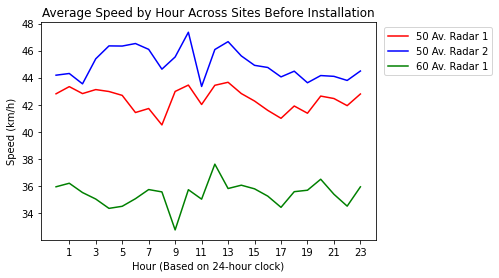

In [160]:
# Lineplot by hour
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites Before Installation')
plt.savefig('avg-speed-by-hr-across-sites.png')

/tmp/ipykernel_446701/2932993050.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_446701/2932993050.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values
/tmp/ipykernel_446701/2932993050.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values


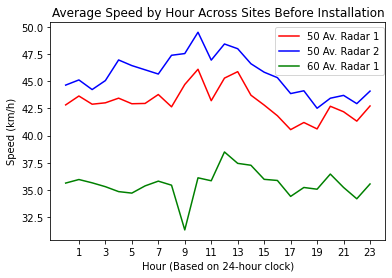

In [161]:
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 0), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 0), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 0), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites Before Installation')
plt.savefig('avg-speed-by-hr-across-sites-before-install.png')

/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]


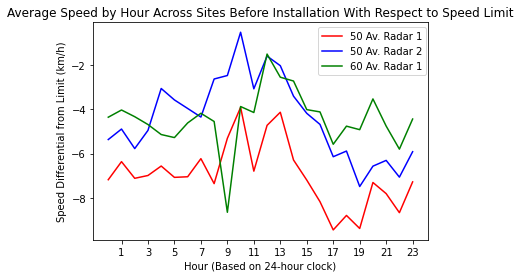

In [162]:
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 0, True), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 0, True), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 0, True), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed Differential from Limit (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites Before Installation With Respect to Speed Limit')
plt.savefig('avg-speed-by-hr-across-sites-before-install-wrt-limit.png')

In [163]:
avg_by_hr(3,1,True)

/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]


array([-3.53299847, -3.39332946, -4.80323471, -5.51849027, -6.65507582,
       -5.95293252, -5.58261338, -4.45887857, -4.25668913, -4.6417295 ,
       -5.06134636, -6.56331604, -4.07961329, -7.29577329, -6.26297829,
       -4.61251349, -5.96988947, -5.60909725, -3.81732365, -3.20906414,
       -3.48385614, -4.40143961, -5.0043415 , -3.46824637])

/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]
/tmp/ipykernel_446701/2932993050.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df['radar'] == radar][df['install'] == install].groupby('hour').mean()['average'].values - df[df['radar'] == radar]['limit'].tolist()[0]


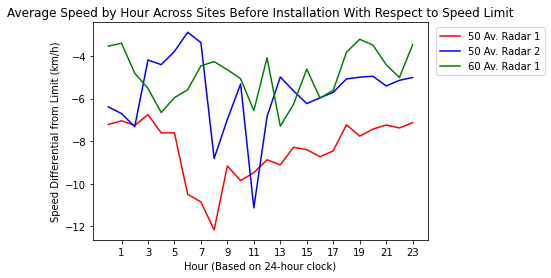

In [164]:
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(1, 1, True), color='red', label="50 Av. Radar 1")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(2, 1, True), color='blue', label="50 Av. Radar 2")
sns.lineplot(x=np.array(range(24)), y=avg_by_hr(3, 1, True), color='green', label="60 Av. Radar 1")
plt.xticks(range(1,24,2))
plt.xlabel('Hour (Based on 24-hour clock)')
plt.ylabel('Speed Differential from Limit (km/h)')
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Average Speed by Hour Across Sites Before Installation With Respect to Speed Limit')
plt.savefig('avg-speed-by-hr-across-sites-before-install-wrt-limit.png')